# STEP 1: Import Library's

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
# set the style of matplotlib to seaborn
sns.set_theme()

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error , mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from dtreeviz.trees import *
from IPython.core.display import display, HTML


# STEP 2: Load the Data

In [2]:
# Load out trainig data set 

data = pd.read_csv("cs9856-spotify-regression-problem-2022/CS98XRegressionTrain.csv")
data.head()

Id                                        title            artist  \
0   1                                 My Happiness    Connie Francis   
1   2                             Unchained Melody   The Teddy Bears   
2   3                        How Deep Is Your Love          Bee Gees   
3   4                                Woman in Love  Barbra Streisand   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John   

         top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  \
0  adult standards  1996  107    31    45  -8    13   28  150     75     3   
1              NaN  2011  114    44    53  -8    13   47  139     49     3   
2  adult standards  1979  105    36    63  -9    13   67  245     11     3   
3  adult standards  1980  170    28    47 -16    13   33  232     25     3   
4        glam rock  1973  121    47    56  -8    15   40  193     45     3   

   pop  
0   44  
1   37  
2   77  
3   67  
4   63

In [3]:
data = data.sample(n = data.shape[0])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 264 to 208
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 56.6+ KB


# STEP 3: Handle Missing Values

In [5]:
# Percentage of missing data is given by 

data.isna().sum()   

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

As wee see here only 3% of the data is missing; soo we will eliminate the data points by dropppng the records that has the missing values 

In [6]:
# drop the records that are having the null values! 

data.dropna(inplace= True, axis= 0)
data.reset_index(drop= True, inplace= True)

# see the amount of data that is missing 
np.round( data.isna().sum() / data.shape[0] *100 ) 


Id           0.0
title        0.0
artist       0.0
top genre    0.0
year         0.0
bpm          0.0
nrgy         0.0
dnce         0.0
dB           0.0
live         0.0
val          0.0
dur          0.0
acous        0.0
spch         0.0
pop          0.0
dtype: float64

# STEP 4: Exploratory Data Analytics

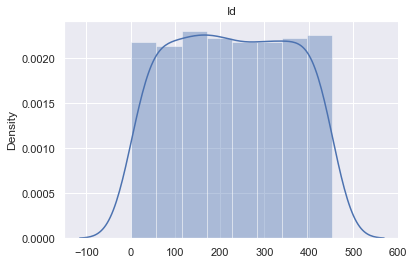

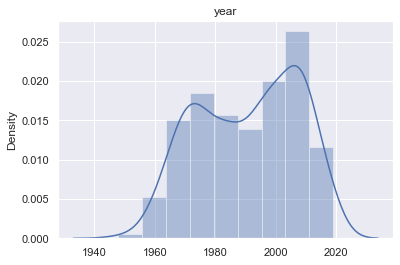

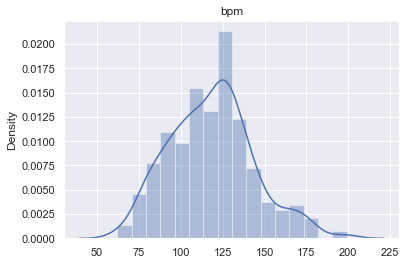

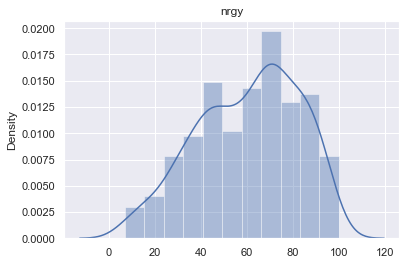

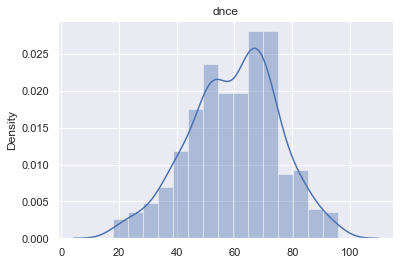

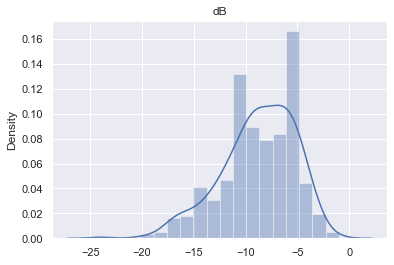

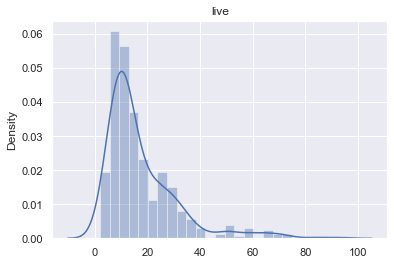

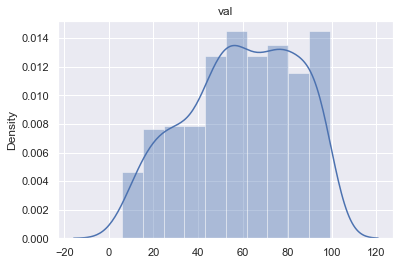

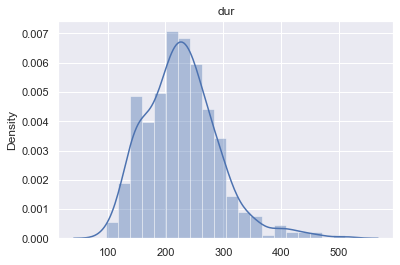

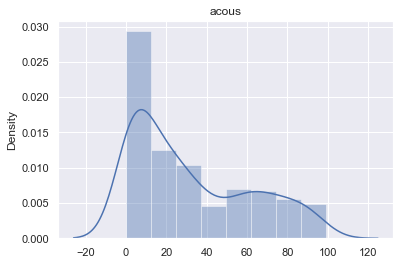

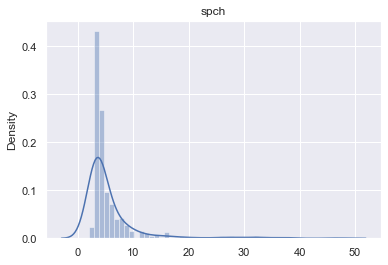

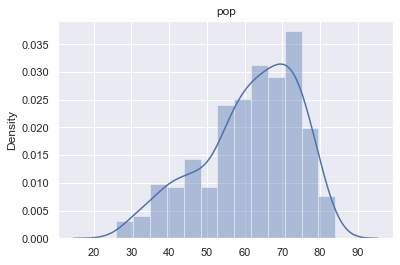

In [7]:
# Plot the various numerical values/ Continious Values and there distrobution 

for i in data.select_dtypes(np.number):
    sns.distplot(data[i].values);
    plt.title(i);
    plt.show();
    

In [8]:
# Lets see the number of unique values in the categorical features 

for i in data.select_dtypes(np.object0):
    print(f"The amount of the unique values in {i} are {data[i].nunique()/data.shape[0] *100 } % ")
    

The amount of the unique values in title are 99.54337899543378 % 
The amount of the unique values in artist are 75.57077625570776 % 
The amount of the unique values in top genre are 19.63470319634703 % 


As you can see here "ID" Column is just the numbers from 1 to the sape of the data frame, we will drop the column! 
Also we the "songs colum has all the unique vales! although the song is important but all the values are unique thus its better we will eliminate that feaature !

In [9]:
# Removing all the categorical values 

data.drop(['Id','title', 'top genre', 'artist'	 ], axis= 1, inplace= True)

# STEP 5: Outlier Detection

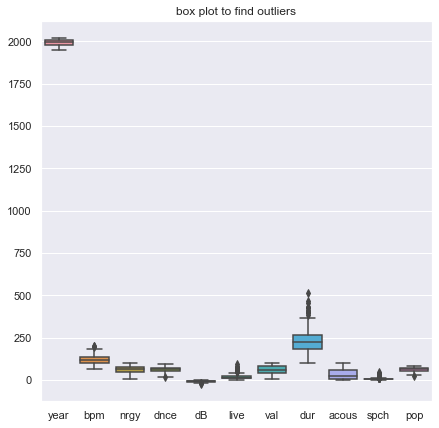

In [10]:
plt.figure(figsize=(7,7))
plt.title("box plot to find outliers")
sns.boxplot(data = data)
plt.show()

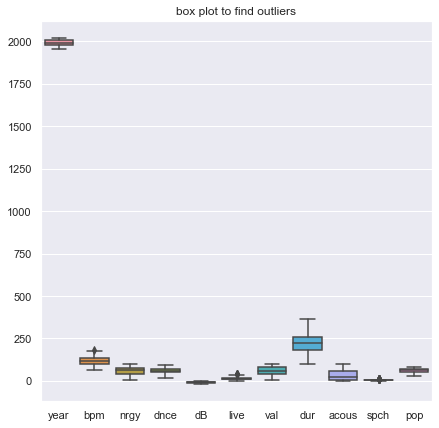

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];


plt.figure(figsize=(7,7))
plt.title("box plot to find outliers")
sns.boxplot(data = data)
plt.show()

# STEP 6: corelation matrix 

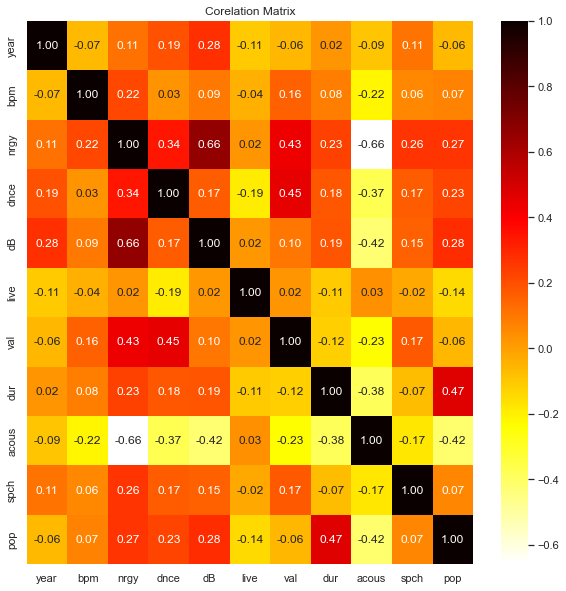

In [12]:


plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot= True, fmt= '.2f', cmap= 'hot_r'  )
plt.title("Corelation Matrix")
plt.show()

# STEP 7: Feature Selection

In [13]:
# analiseing the feature importance using randome forest

fe_imp = RandomForestRegressor(max_depth= 6 )
fe_imp.fit(data.iloc[:, :-1].values , data.iloc[:, -1].values)

for i, j in enumerate(fe_imp.feature_importances_):
    print(f"{i} :   {data.columns[i]}  has the { np.around(j , decimals= 2 ) } importance")

0 :   year  has the 0.1 importance
1 :   bpm  has the 0.05 importance
2 :   nrgy  has the 0.08 importance
3 :   dnce  has the 0.05 importance
4 :   dB  has the 0.06 importance
5 :   live  has the 0.05 importance
6 :   val  has the 0.04 importance
7 :   dur  has the 0.45 importance
8 :   acous  has the 0.09 importance
9 :   spch  has the 0.03 importance


# STEP 8: Dimentianality Reduction 

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1'])

DATA['Target'] = data.iloc[:, -1].values


DATA.head()

PC-1  Target
0  26.909005      60
1  91.959174      57
2 -78.237953      59
3 -13.500977      62
4  21.021402      71

# STEP 9: Split data and normalisation 

In [15]:
# SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split( DATA.iloc[:, :-1].values, 
                                                    DATA.iloc[:, -1].values, 
                                                    test_size=0.20)

In [16]:
# DATA SCALING 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# STEP 10: Model Training and Analysis 

In [17]:
def regression_evaluation_report(test , predict):
    """
    input: 
        test: actual values 
        predict: values predicted by the model 
    
    output: Generates a report based on various metrics  
    """

    print(f"Root Mean Square Error = { np.sqrt( mean_squared_error(test, predict) )} ")
    
    print(f"The mean absolute error = {mean_absolute_error(test, predict) }")

    print(f"The mean absolute percentage error = {mean_absolute_percentage_error(test, predict) }  ")

    print(f" r2_score = {r2_score(test, predict) }  ")






In [18]:
def plot_learning_curve(model, model_type):
    """
    input  : takess the object of the model
    output :  
    """
    train_error , test_error = [] , []

    for i in range(1 , len(X_train)):
        model.fit(X_train[:i] , y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_test_pred  = model.predict(X_test)
        train_error.append(mean_squared_error(y_train[:i], y_train_pred))
        test_error.append(mean_squared_error(y_test_pred , y_test))
    
    plt.figure(figsize=(10,10))
    plt.plot(np.sqrt(train_error) , "r-+" , label = "Train" )
    plt.plot(np.sqrt(test_error) , "b-" , label = "Test" )
    plt.xlabel(" epochs ")
    plt.ylabel("RMSE")
    plt.title(model_type)
    plt.legend()
    plt.show()
    
    

### Simple Linear Regression 

Root Mean Square Error = 10.979328984162688 
The mean absolute error = 9.178054975041679
The mean absolute percentage error = 0.1747224441289016  
 r2_score = 0.3748366520833508  


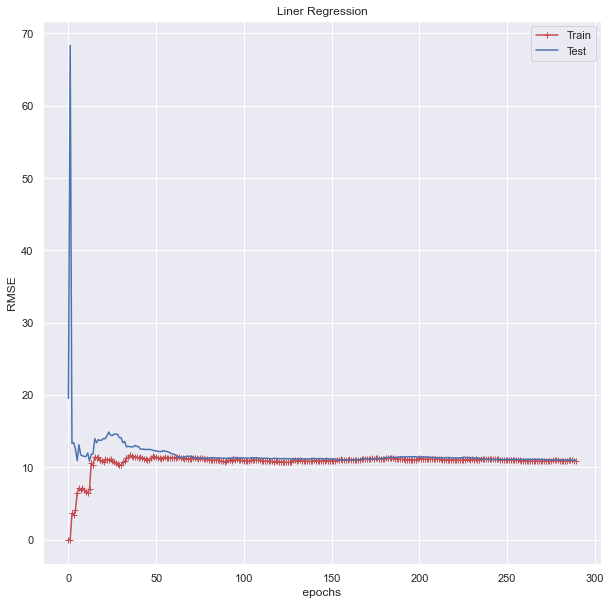

In [19]:
model_1 = LinearRegression() 
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

regression_evaluation_report(y_test, y_pred_1)
plot_learning_curve(model_1, "Liner Regression")

### Regularized Linear Regression (Elastic Net)

Root Mean Square Error = 11.161941080435803 
The mean absolute error = 9.32260263495487
The mean absolute percentage error = 0.1786094189889085  
 r2_score = 0.35386783252589793  


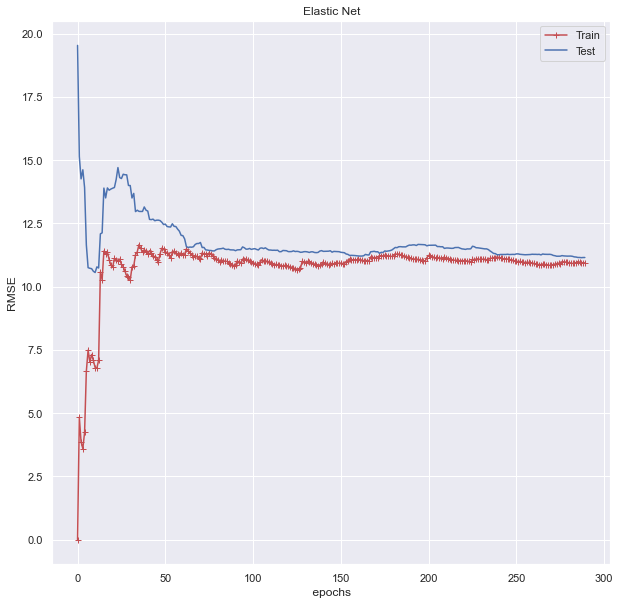

In [20]:
model_1_1 = ElasticNet(alpha= 0.2 , l1_ratio= 0.6)

model_1_1.fit(X_train, y_train)
y_pred_1_1 = model_1_1.predict(X_test);

regression_evaluation_report(y_test, y_pred_1_1)
plot_learning_curve(model_1_1, "Elastic Net")

### Decission Tree 

Root Mean Square Error = 12.519573715881753 
The mean absolute error = 9.506849315068493
The mean absolute percentage error = 0.178278375513503  
 r2_score = 0.187130189031796  


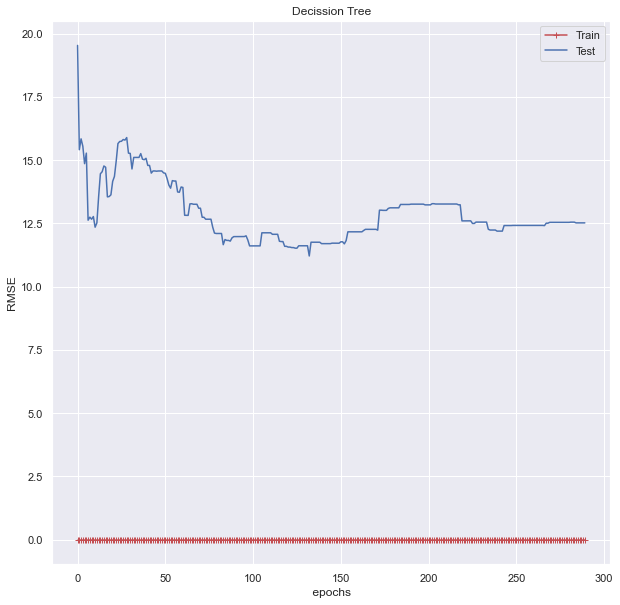

In [21]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

regression_evaluation_report(y_test, y_pred_2)
plot_learning_curve(model_2, "Decission Tree")

viz = dtreeviz(model_2 ,X_train, y_train, target_name='Target', feature_names= ['PC-1'], scale= 0.3)

# Visualise the decission tree 
viz

As we see here the decission tree has over-fitted, every data point has been learnt as a result the error of the test set is very high!! Now to over come this we try to do some hyper parameter tuning 

Root Mean Square Error = 9.512945901401462 
The mean absolute error = 7.783040526934318
The mean absolute percentage error = 0.14323100484155657  
 r2_score = 0.530676862500566  


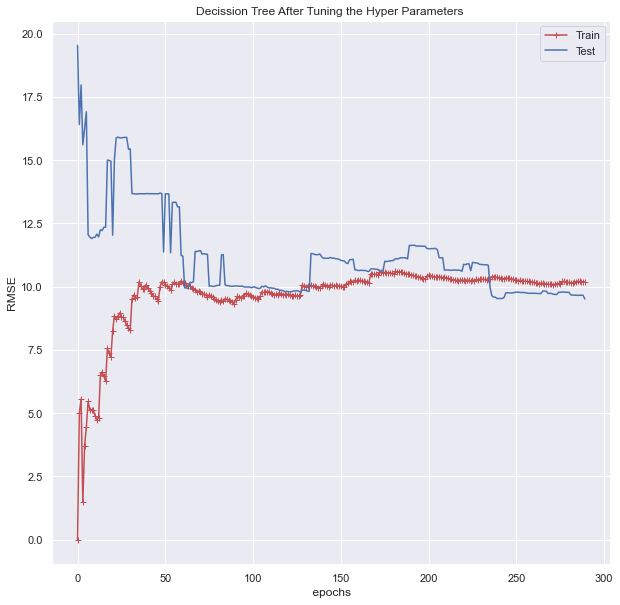

Decision Tree Structure


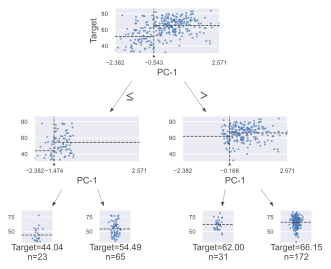

In [26]:
model_2 = DecisionTreeRegressor( max_depth = 2 , min_samples_split = 4 ,
                                min_impurity_decrease = 0.1)

model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

regression_evaluation_report(y_test, y_pred_2)
plot_learning_curve(model_2, "Decission Tree After Tuning the Hyper Parameters ")

print("Decision Tree Structure")

viz = dtreeviz(model_2 ,X_train, y_train, target_name='Target', feature_names= ['PC-1'], scale= 1)

# Visualise the decission tree 
viz

### Random forest 

Root Mean Square Error = 11.076783569546501 
The mean absolute error = 8.352328767123286
The mean absolute percentage error = 0.15567994631184298  
 r2_score = 0.3636892630251316  


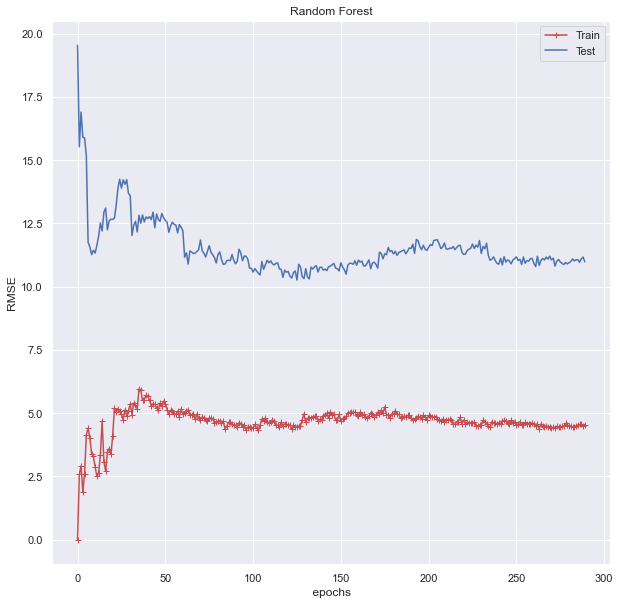

In [27]:
model_3 = RandomForestRegressor()

model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
regression_evaluation_report(y_test, y_pred_3)
plot_learning_curve(model_3, "Random Forest")

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 6,9, 11,2]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model_3 = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; t

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 9, 11, 2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 2,
 'bootstrap': True}

In [30]:
model_3 = RandomForestRegressor(n_estimators =  1000,
                                min_samples_split = 10, 
                                min_samples_leaf = 2, 
                                max_features = 'sqrt',
                                max_depth = 2, 
                                bootstrap = True)

# Training a model 
model_3.fit(X_train, y_train)

# Performing Prediction 
y_pred_3 = model_3.predict(X_test)

regression_evaluation_report(y_test, y_pred_3)

#plot_learning_curve(model_3, "Random Forest After Tuning Hyper Parameters ")

Root Mean Square Error = 9.74843379711119 
The mean absolute error = 8.086464749496272
The mean absolute percentage error = 0.15102781393526055  
 r2_score = 0.5071535817012671  


### SVM for Regression

Root Mean Square Error = 10.837745979252768 
The mean absolute error = 8.928293379624165
The mean absolute percentage error = 0.1734299140131798  
 r2_score = 0.39085617435740094  


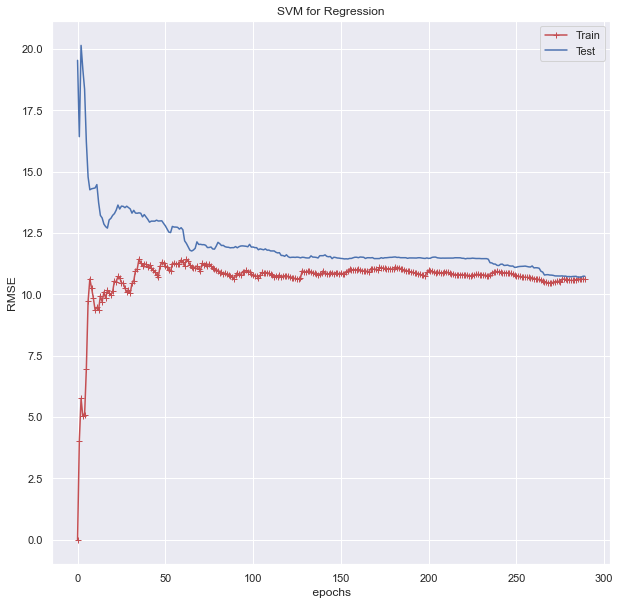

In [31]:
# Without Tuning hyper parameters 

model_4 = SVR()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

regression_evaluation_report(y_test, y_pred_4)
plot_learning_curve(model_4, "SVM for Regression")

In [32]:
#Tuning Hyper Parameters using Gaussian kernel 

# defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = RandomizedSearchCV(estimator = SVR(),
param_distributions = param_grid, 
n_iter = 100, 
cv = 3, 
verbose=2, 
random_state=42, 
n_jobs = -1)


 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=42, verbose=2)

In [33]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}

Root Mean Square Error = 9.676727440351431 
The mean absolute error = 7.922212230213388
The mean absolute percentage error = 0.14771753400280643  
 r2_score = 0.5143773565470189  


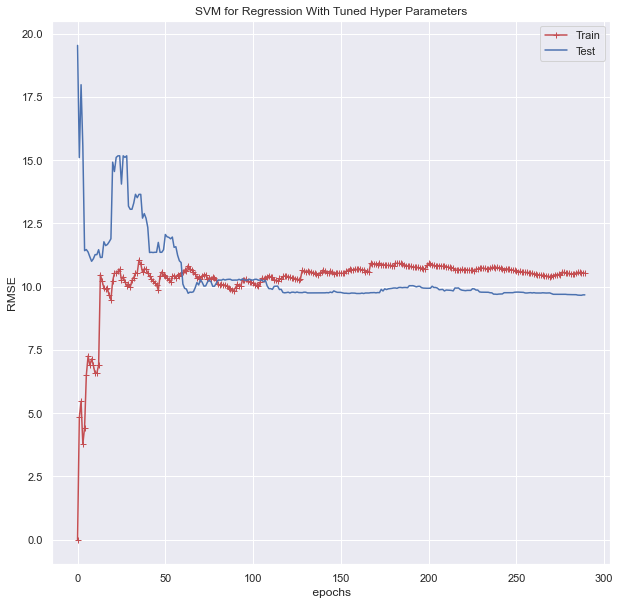

In [34]:
model_4_1 = SVR(C = 1000, gamma = 0.01,  kernel = 'rbf')
model_4_1.fit(X_train, y_train)
y_pred_4_1 = model_4_1.predict(X_test)

regression_evaluation_report(y_test, y_pred_4_1)
plot_learning_curve(model_4_1, "SVM for Regression With Tuned Hyper Parameters")

In [35]:
#Tuning Hyper Parameters using Polynomial Kernel

# defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 1000, 5,0.001], 
            'degree': [3,5,2] , 
            'coef0' : [0.01 ,  0.2, 0.8],
            'kernel': ['poly']}
 
grid = RandomizedSearchCV(estimator = SVR(),
                               param_distributions = param_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)


 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV] END ...........C=0.1, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=5, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=5, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=5, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=2, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=2, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, coef0=0.2, degree=3, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, coef0=0.2, degree=3, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, coef0=0.01, degree=2, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, coef0=0.2, degree=3

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000, 5, 0.001],
                                        'coef0': [0.01, 0.2, 0.8],
                                        'degree': [3, 5, 2],
                                        'kernel': ['poly']},
                   random_state=42, verbose=2)

In [36]:
grid.best_params_

{'kernel': 'poly', 'degree': 2, 'coef0': 0.8, 'C': 1}

Root Mean Square Error = 9.753450449376643 
The mean absolute error = 8.03334299713367
The mean absolute percentage error = 0.15103905090166042  
 r2_score = 0.5066462027059012  


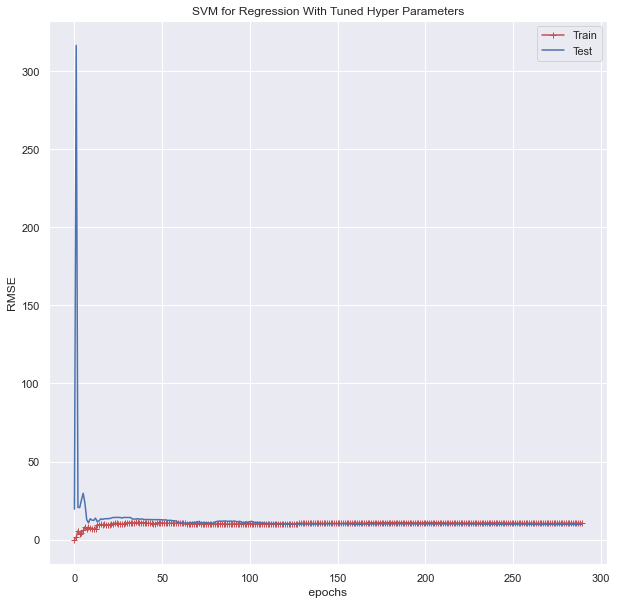

In [37]:
model_4_2 = SVR( kernel = 'poly', degree = 2, coef0 = 0.8, C = 1)
model_4_2.fit(X_train, y_train)
y_pred_4_2 = model_4_2.predict(X_test)

regression_evaluation_report(y_test, y_pred_4_2)
plot_learning_curve(model_4_2, "SVM for Regression With Tuned Hyper Parameters")

# STEP 11: Save Model

In [44]:
if False: 
    Pkl_Filename = "best_model.pkl"  

    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(model_4_2, file) 

if True:
    # Load the Model back from file
    with open('/Users/junaidiqbalsyed/Documents/Masters/ML for data Analytics/ Spotify_Regression_Problem_2022/best_model.pkl', 'rb') as file:  
        model = pickle.load(file)

# STEP 12: Generate Test Results 


As we see here from the analysis, the model that gives the best result (i.e., least RMSE ) with test data is 
tuned Randome forest ! 


In [38]:
# Load the test data points 

df = pd.read_csv("cs9856-spotify-regression-problem-2022/CS98XRegressionTest.csv")
df.head()

Id                                              title  \
0  454                                            Pump It   
1  455  Circle of Life - From "The Lion King"/Soundtra...   
2  456             We Are The Champions - Remastered 2011   
3  457                              Insomnia - Radio Edit   
4  458                                This Eve of Parting   

                artist         top genre  year  bpm  nrgy  dnce  dB  live  \
0  The Black Eyed Peas         dance pop  2005  154    93    65  -3    75   
1           Elton John         glam rock  1994  161    39    30 -15    11   
2                Queen         glam rock  1977   64    46    27  -7    12   
3            Faithless          big beat  2010  127    92    71  -9    37   
4        John Hartford  appalachian folk  2018  115    46    56 -12    21   

   val  dur  acous  spch  
0   74  213      1    18  
1   14  292     26     3  
2   18  179     38     3  
3   53  216      6     4  
4   34  153     18     3

In [39]:
Id = df.iloc[:, 0].values

In [40]:
# Removing all the categorical values 

df.drop(['Id','title', 'top genre', 'artist'	], axis= 1, inplace= True)
df.head()

year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0  2005  154    93    65  -3    75   74  213      1    18
1  1994  161    39    30 -15    11   14  292     26     3
2  1977   64    46    27  -7    12   18  179     38     3
3  2010  127    92    71  -9    37   53  216      6     4
4  2018  115    46    56 -12    21   34  153     18     3

In [41]:
"""
Lets try to scale and transform the data based on, how that data points are trained 
"""

# Reduce the dimentions of the data points so that it is similar to how the data was trained 
Test = pca.transform(df.iloc[:,:].values)

# Scale the data 
Test = scalar.transform(Test)

# Get the predictions for the test data points 




In [49]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['Id'] = Id
res['pop'] = pd.DataFrame(   model.predict(Test)  )

# Save the csv file 
res.to_csv( 'results.csv' , index = False)